In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.cluster import KMeans

In [20]:
df = pd.read_csv("/advertising.csv")


In [21]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [22]:
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'

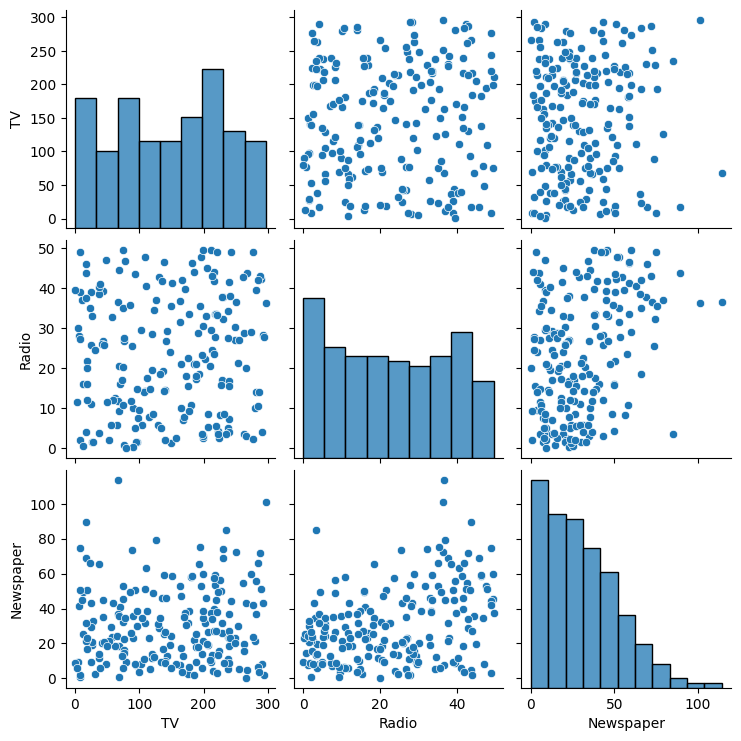

In [23]:
sns.pairplot(df[features])
plt.show()

In [24]:
X = df[features]
y = df[target]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [27]:
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)
y_pred_svr_scaled = svr.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1,1)).ravel()


In [29]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} -- MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}")
    return mae, mse, rmse

metrics = {}
metrics['Linear Regression'] = evaluate_model(y_test, y_pred_lr, 'Linear Regression')
metrics['Polynomial Regression'] = evaluate_model(y_test, y_pred_poly, 'Polynomial Regression')
metrics['SVR'] = evaluate_model(y_test, y_pred_svr, 'SVR')

Linear Regression -- MAE: 1.275, MSE: 2.908, RMSE: 1.705
Polynomial Regression -- MAE: 0.903, MSE: 1.443, RMSE: 1.201
SVR -- MAE: 1.185, MSE: 2.440, RMSE: 1.562


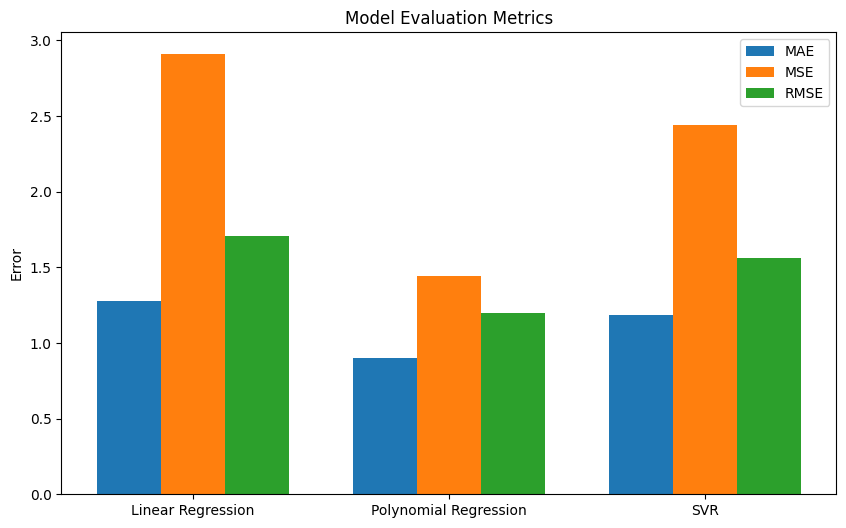

In [30]:
models = list(metrics.keys())
mae = [metrics[m][0] for m in models]
mse = [metrics[m][1] for m in models]
rmse = [metrics[m][2] for m in models]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mae, width, label='MAE')
plt.bar(x, mse, width, label='MSE')
plt.bar(x + width, rmse, width, label='RMSE')
plt.xticks(x, models)
plt.ylabel('Error')
plt.title('Model Evaluation Metrics')
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

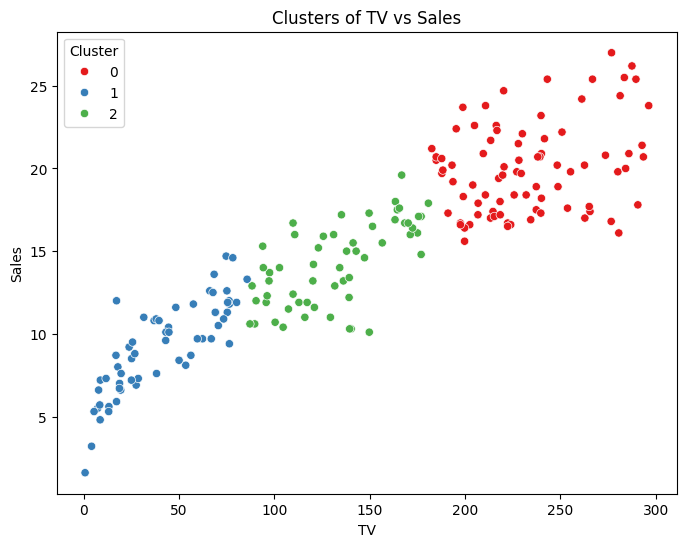

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV', y='Sales', hue='Cluster', palette='Set1')
plt.title('Clusters of TV vs Sales')
plt.show()